# Préparation des Données

In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error


# Chargement des données
x1 = pd.read_csv("../Ressources/Datasets/stand_norm_e1.txt", delimiter='\s+')
x2 = pd.read_csv("../Ressources/Datasets/stand_norm_e2.txt", delimiter='\s+')
y = pd.read_csv("../Ressources/Datasets/y2_e1.txt", header=None, names=['Target'], delimiter='\s+')

# Concaténation des DataFrames
df = pd.concat([x1, x2, y], axis=1)

# Séparation en variables explicatives et variable cible
X = df.drop('Target', axis=1)
y = df['Target']

# Division en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Application de la Régression Ridge et Lasso

### Régression Ridge

MSE est une métrique couramment utilisée pour évaluer la qualité des modèles de régression. Elle mesure la moyenne des carrés des écarts entre les valeurs prédites par le modèle et les valeurs réelles. 

$$
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (Y_i - \hat{Y}_i)^2
$$

où :
- \( Y_i \) représente la valeur réelle pour chaque observation \( i \),
- \( \hat{Y}_i \) est la valeur prédite par le modèle pour la même observation,
- \( n \) est le nombre total d'observations dans l'ensemble de test.

Calcule la moyenne des carrés des écarts entre les prédictions et les valeurs réelles, fournissant une mesure standard de la performance du modèle de régression.

In [34]:
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (Y_i - \hat{Y}_i)^2

SyntaxError: unexpected character after line continuation character (4264925339.py, line 1)

In [6]:
# Régression Ridge

from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

# Création et entraînement du modèle Ridge
ridge_model = Ridge(alpha=1.0)  # Alpha est le paramètre de régularisation
ridge_model.fit(X_train, y_train)

# Prédiction et évaluation
ridge_predictions = ridge_model.predict(X_test)
ridge_mse = mean_squared_error(y_test, ridge_predictions)
print("MSE Ridge:", ridge_mse)


MSE Ridge: 0.15347355992435588


Taille de l'erreur : Une MSE de 0.1537 indique que, en moyenne, le carré de l'erreur entre les prédictions et les valeurs réelles est de 0.1537. Pour donner un sens plus intuitif à ce chiffre, on peut considérer la racine carrée de la MSE, connue sous le nom de RMSE (Root Mean Squared Error), qui serait en unités comparables à celles de la variable cible. La RMSE serait donc 0.1537≈0.3920.1537
​≈0.392.

### Régression Lasso

In [22]:
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso

# Création et entraînement du modèle Lasso avec validation croisée pour sélectionner alpha automatiquement
lasso_cv_model = LassoCV(cv=5)  # cv indique le nombre de folds pour la validation croisée
lasso_cv_model.fit(X_train, y_train)

# Alpha sélectionné par la validation croisée
selected_alpha = lasso_cv_model.alpha_
print("Alpha sélectionné par la validation croisée:", selected_alpha)

# Utilisation de l'alpha sélectionné pour créer un nouveau modèle Lasso
lasso_auto_model = Lasso(alpha=selected_alpha)
lasso_auto_model.fit(X_train, y_train)

# Prédiction et évaluation
lasso_auto_predictions = lasso_auto_model.predict(X_test)
lasso_auto_mse = mean_squared_error(y_test, lasso_auto_predictions)
print("MSE Lasso avec alpha sélectionné automatiquement:", lasso_auto_mse)


Alpha sélectionné par la validation croisée: 0.0642654328414498
MSE Lasso avec alpha sélectionné automatiquement: 0.15653467097692653


In [23]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import r2_score

# Calcul du R-squared
ridge_r2 = r2_score(y_test, ridge_predictions)
lasso_r2 = r2_score(y_test, lasso_auto_predictions)

print("R-squared for Ridge Regression:", ridge_r2)
print("R-squared for Lasso Regression:", lasso_r2)

R-squared for Ridge Regression: 0.09742022683456797
R-squared for Lasso Regression: 0.07941779748566125


# Visualisation des Résidus

 les résidus c'est la différence entre les valeurs observées et les valeurs prédites. Permet de révéler les tendances ou des pb dans les prédictions du modèle.

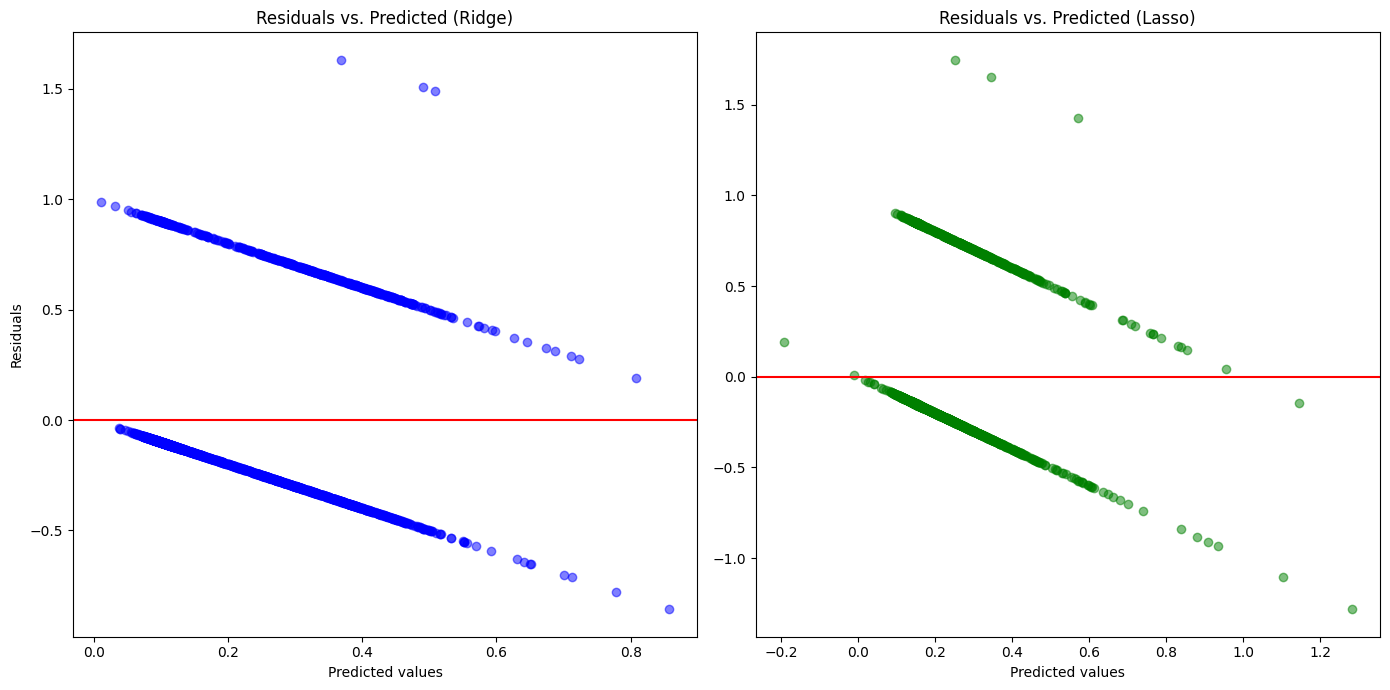

In [24]:
import matplotlib.pyplot as plt
import numpy as np

# Prédiction avec les modèles
y_pred_ridge = ridge_model.predict(X_test)
y_pred_lasso = lasso_auto_model.predict(X_test)

# Calcul des résidus
residuals_ridge = y_test - y_pred_ridge
residuals_lasso = y_test - y_pred_lasso

# Tracer les résidus
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.scatter(y_pred_ridge, residuals_ridge, color='blue', alpha=0.5)
plt.title('Residuals vs. Predicted (Ridge)')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='-')

plt.subplot(1, 2, 2)
plt.scatter(y_pred_lasso, residuals_lasso, color='green', alpha=0.5)
plt.title('Residuals vs. Predicted (Lasso)')
plt.xlabel('Predicted values')
plt.axhline(y=0, color='r', linestyle='-')

plt.tight_layout()
plt.show()


## Comparaison des Prédictions avec les Valeurs Réelles

Un autre graphique utile est de comparer directement les prédictions avec les valeurs réelles pour chaque modèle

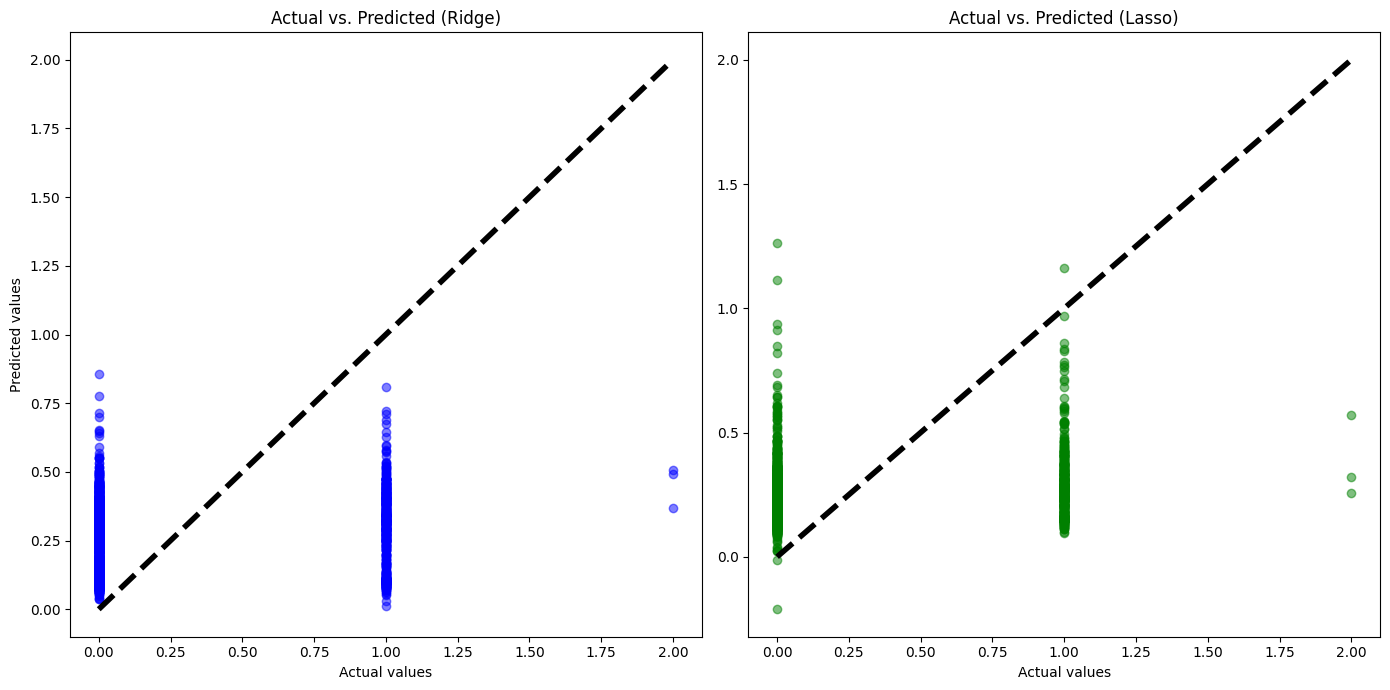

In [11]:
# Comparaison des prédictions avec les valeurs réelles
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_ridge, alpha=0.5, color='blue')
plt.title('Actual vs. Predicted (Ridge)')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_lasso, alpha=0.5, color='green')
plt.title('Actual vs. Predicted (Lasso)')
plt.xlabel('Actual values')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)

plt.tight_layout()
plt.show()


# Importance des Caractéristiques

Aperçu sur l'importance ou les coefficients des caractéristiques pour voir quelles variables ont le plus d'influence sur la prédiction.

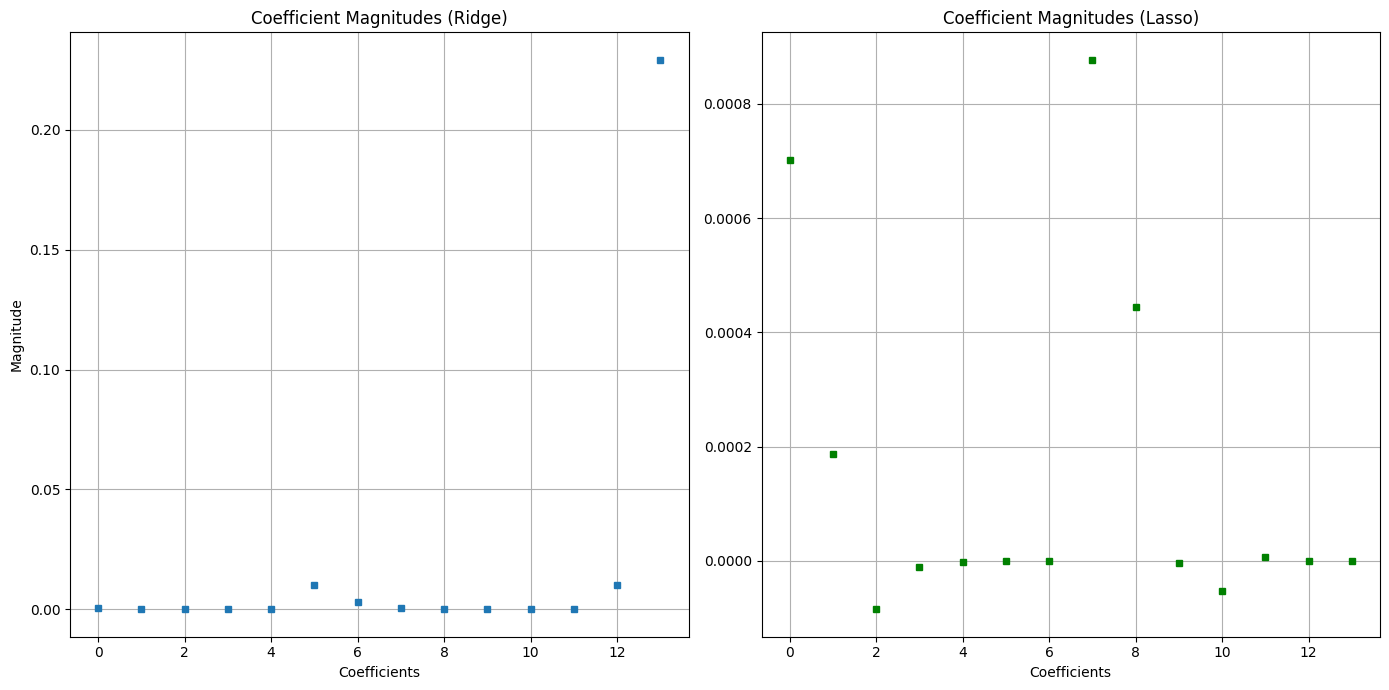

In [25]:
# Tailles des coefficients
coefficients_ridge = ridge_model.coef_
coefficients_lasso = lasso_auto_model.coef_

# Tracer les coefficients
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.plot(coefficients_ridge, 's', markersize=5, label='Ridge Coefficients')
plt.title('Coefficient Magnitudes (Ridge)')
plt.xlabel('Coefficients')
plt.ylabel('Magnitude')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(coefficients_lasso, 's', markersize=5, label='Lasso Coefficients', color='green')
plt.title('Coefficient Magnitudes (Lasso)')
plt.xlabel('Coefficients')
plt.grid(True)

plt.tight_layout()
plt.show()
